In [257]:
#Importing Libraries:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt


In [258]:
#Uploading data file:
df1 = pd.read_csv('data_main.csv')
#print(df1)
df1.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
2,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
3,01-08-2020,campaign 1,adgroup 1,ad 7,26,10,0.10,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 9,329,130,1.40,3,397.59


In [259]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
impressions,4571.0,92.635747,198.349737,1.0,6.00,16.00,84.00,3239.00
clicks,4571.0,43.340844,100.164913,0.0,2.00,7.00,38.00,1771.00
cost,4571.0,2.800834,14.361618,0.0,0.04,0.21,1.35,531.25
conversions,4571.0,1.339094,5.223922,0.0,0.00,0.00,1.00,94.00
revenue,4571.0,231.865340,1091.742763,0.0,0.00,0.00,92.60,20515.41


In [260]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
date           4571 non-null object
campaign       4571 non-null object
adgroup        4571 non-null object
ad             4571 non-null object
impressions    4571 non-null int64
clicks         4571 non-null int64
cost           4571 non-null float64
conversions    4571 non-null int64
revenue        4571 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


(4571, 9)

In [261]:
df1.isnull()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4566,False,False,False,False,False,False,False,False,False
4567,False,False,False,False,False,False,False,False,False
4568,False,False,False,False,False,False,False,False,False
4569,False,False,False,False,False,False,False,False,False


In [262]:
df1.drop('campaign',axis=1,inplace=True)
df1.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,adgroup 1,ad 2,247,126,1.29,4,925.71
2,01-08-2020,adgroup 1,ad 3,129,52,0.58,0,0.00
3,01-08-2020,adgroup 1,ad 7,26,10,0.10,0,0.00
4,01-08-2020,adgroup 1,ad 9,329,130,1.40,3,397.59


In [263]:
#Classifying data on basis of adgroup:
g = df1.groupby('adgroup')
g

In [264]:
for adgroup, adgroup_df in g:
    print(adgroup)
    print(adgroup_df)   

adgroup 1
            date    adgroup     ad  impressions  clicks  cost  conversions  \
0     01-08-2020  adgroup 1   ad 1           24       6  0.08            0   
1     01-08-2020  adgroup 1   ad 2          247     126  1.29            4   
2     01-08-2020  adgroup 1   ad 3          129      52  0.58            0   
3     01-08-2020  adgroup 1   ad 7           26      10  0.10            0   
4     01-08-2020  adgroup 1   ad 9          329     130  1.40            3   
...          ...        ...    ...          ...     ...   ...          ...   
1309  28-02-2021  adgroup 1   ad 3          333     156  2.82            5   
1310  28-02-2021  adgroup 1   ad 7           78      37  0.50            2   
1311  28-02-2021  adgroup 1  ad 10           10       2  0.02            0   
1312  28-02-2021  adgroup 1  ad 56           37      13  0.23            0   
1313  28-02-2021  adgroup 1  ad 55           19      10  0.14            0   

      revenue  
0        0.00  
1      925.71  
2    

In [265]:
#Plotting table for adgroup vs date:
df1.pivot_table(index='date',columns='adgroup')

clicks                                   conversions  \
adgroup      adgroup 1  adgroup 2   adgroup 3  adgroup 4   adgroup 1   
date                                                                   
01-01-2021   45.857143  12.000000   40.333333   1.600000    1.000000   
01-02-2021   48.857143   1.200000   33.333333   2.000000    1.285714   
01-08-2020   54.333333   0.800000   56.625000   3.500000    1.166667   
01-09-2020   88.000000   1.250000   67.857143   3.333333    3.400000   
01-10-2020   61.400000   5.000000   48.375000   6.333333    2.200000   
...                ...        ...         ...        ...         ...   
30-12-2020   56.857143   4.000000   46.000000   1.600000    1.428571   
31-01-2021   45.714286   2.250000   44.555556   1.750000    1.571429   
31-08-2020  260.500000   5.500000  325.500000  13.000000   17.000000   
31-10-2020   44.900000   2.500000   39.583333   3.500000    0.900000   
31-12-2020   46.857143   1.333333   35.888889   2.000000    0.857143   

                                                cost                       \
adgroup    adgroup 2  adgroup 3 adgroup 4  adgroup 1 adgroup 2  adgroup 3   
date                                                                        
01-01-2021      1.00   1.333333  0.000000   0.587143    0.1800   0.528889   
01-02-2021      0.00   1.111111  0.000000   0.862857    0.0200   0.584444   
01-08-2020      0.00   1.125000  0.000000   0.578333    0.0160   0.588750   
01-09-2020      0.00   1.571429  0.000000   3.886000    0.0975   3.872857   
01-10-2020      0.00   2.125000  0.666667   3.474000    0.9000   5.093750   
...              ...        ...       ...        ...       ...        ...   
30-12-2020      0.00   1.444444  0.200000   0.714286    0.0600   0.597778   
31-01-2021      0.25   1.000000  0.000000   0.958571    0.0400   0.805556   
31-08-2020      0.00  14.500000  1.000000  18.325000    0.7550  27.490000   
31-10-2020      0.00   0.333333  0.000000   5.331000    0.4450   2.817500   
31-12-2020      0.00   1.111111  0.000000   0.548571    0.0200   0.453333   

                     impressions                                    \
adgroup    adgroup 4   adgroup 1  adgroup 2   adgroup 3  adgroup 4   
date                                                                 
01-01-2021  0.022000  110.857143  17.000000   83.000000   3.200000   
01-02-2021  0.107500  117.857143   2.600000   66.222222   5.250000   
01-08-2020  0.050000  126.666667   4.400000  119.125000   4.750000   
01-09-2020  0.583333  187.200000   6.250000  133.142857   7.000000   
01-10-2020  1.313333  144.600000   9.000000   98.875000  11.333333   
...              ...         ...        ...         ...        ...   
30-12-2020  0.016000  132.857143  15.000000   95.444444   2.600000   
31-01-2021  0.027500  118.428571   3.750000   91.444444   5.250000   
31-08-2020  2.710000  577.000000  17.500000  603.000000  20.000000   
31-10-2020  1.260000  102.500000   4.666667   80.000000   4.750000   
31-12-2020  0.024000  125.000000   4.666667   81.111111   3.600000   

                revenue                                     
adgroup       adgroup 1 adgroup 2    adgroup 3   adgroup 4  
date                                                        
01-01-2021   210.054286  220.2000   111.472222    0.000000  
01-02-2021   144.831429    0.0000   236.394444    0.000000  
01-08-2020   220.550000    0.0000   132.702500    0.000000  
01-09-2020   688.952000    0.0000   265.330000    0.000000  
01-10-2020   566.272000    0.0000   412.118750   65.673333  
...                 ...       ...          ...         ...  
30-12-2020    99.871429    0.0000   168.108889   17.000000  
31-01-2021   451.857143    9.6575   134.055556    0.000000  
31-08-2020  3085.315000    0.0000  2789.750000  119.785000  
31-10-2020   102.916000    0.0000    23.657500    0.000000  
31-12-2020    92.328571    0.0000   158.878889    0.000000  

[212 rows x 20 columns]

In [266]:
#Converting date in str to datetime format:
df1['date'] = pd.to_datetime(df1['date'])
df1

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-01-08,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-01-08,adgroup 1,ad 2,247,126,1.29,4,925.71
2,2020-01-08,adgroup 1,ad 3,129,52,0.58,0,0.00
3,2020-01-08,adgroup 1,ad 7,26,10,0.10,0,0.00
4,2020-01-08,adgroup 1,ad 9,329,130,1.40,3,397.59
...,...,...,...,...,...,...,...,...
4566,2021-02-27,adgroup 4,ad 56,1,0,0.00,0,0.00
4567,2021-02-28,adgroup 4,ad 1,4,0,0.00,0,0.00
4568,2021-02-28,adgroup 4,ad 2,2,0,0.00,0,0.00
4569,2021-02-28,adgroup 4,ad 3,9,2,0.03,0,0.00


In [267]:
df1.dtypes

date           datetime64[ns]
adgroup                object
ad                     object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

In [268]:
#Sampling the yearly data on Weekly basis: 
df1['Weekdays']= df1.date.dt.strftime("%a")
df1

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue,Weekdays
0,2020-01-08,adgroup 1,ad 1,24,6,0.08,0,0.00,Wed
1,2020-01-08,adgroup 1,ad 2,247,126,1.29,4,925.71,Wed
2,2020-01-08,adgroup 1,ad 3,129,52,0.58,0,0.00,Wed
3,2020-01-08,adgroup 1,ad 7,26,10,0.10,0,0.00,Wed
4,2020-01-08,adgroup 1,ad 9,329,130,1.40,3,397.59,Wed
...,...,...,...,...,...,...,...,...,...
4566,2021-02-27,adgroup 4,ad 56,1,0,0.00,0,0.00,Sat
4567,2021-02-28,adgroup 4,ad 1,4,0,0.00,0,0.00,Sun
4568,2021-02-28,adgroup 4,ad 2,2,0,0.00,0,0.00,Sun
4569,2021-02-28,adgroup 4,ad 3,9,2,0.03,0,0.00,Sun


C:\Users\Rukaiya Shamim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


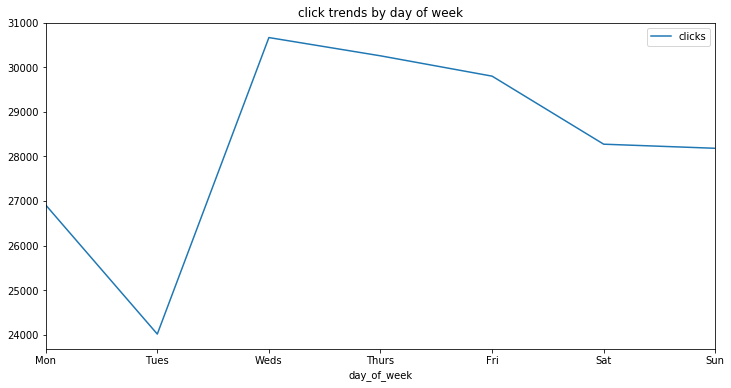

In [269]:
#Plotting graph weekdays wise: #["Clicks"]
df1['day_of_week'] = df1['date'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1.groupby('day_of_week').agg({'clicks':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

C:\Users\Rukaiya Shamim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


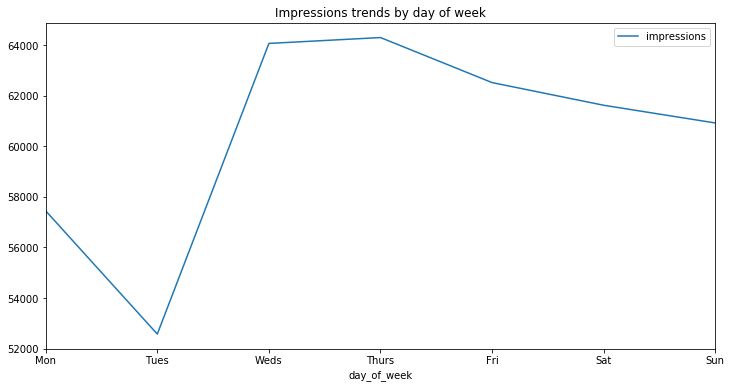

In [270]:
#Plotting graph weekdays wise: #["Impressions"]
df1['day_of_week'] = df1['date'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1.groupby('day_of_week').agg({'impressions':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions trends by day of week');

C:\Users\Rukaiya Shamim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


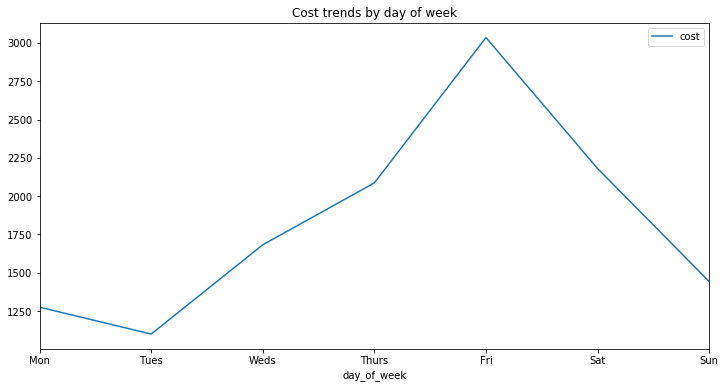

In [271]:
#Plotting graph weekdays wise: #["Cost"]
df1['day_of_week'] = df1['date'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1.groupby('day_of_week').agg({'cost':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Cost trends by day of week');

C:\Users\Rukaiya Shamim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


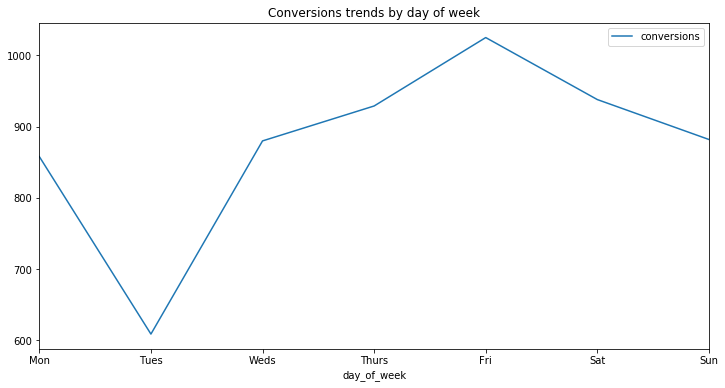

In [272]:
df1['day_of_week'] = df1['date'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1.groupby('day_of_week').agg({'conversions':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Conversions trends by day of week');

C:\Users\Rukaiya Shamim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


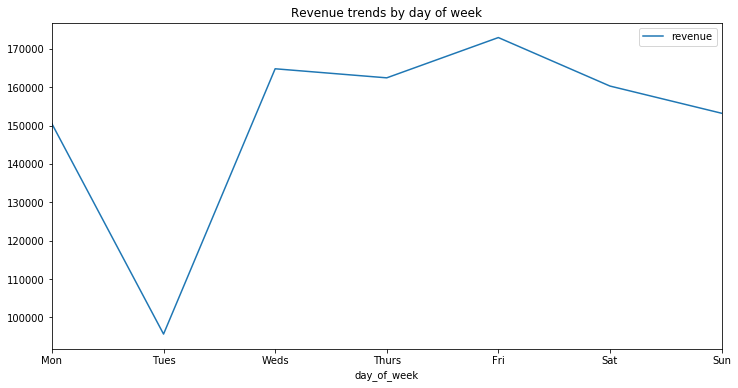

In [273]:
#Plotting graph weekdays wise: #["Revenue"]
df1['day_of_week'] = df1['date'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1.groupby('day_of_week').agg({'revenue':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Revenue trends by day of week');

In [ ]:
#Analysis from Graph on Week basis over the period from 1/08/2020-28/02/2021:
'''
The Parameters like click, impression, costs and Revenue are dependent on each other. 
From impression and click graph, It is visible the number increases in mid of the week between wednesday and friday, friday being the highest.
Although the highest revcenue earned on friday also the amount spent on add is also on friday, from which one can drive that if cost 
spent is more on ad then the effect is positive.
'''

In [274]:
#Finding Efficiency Metrics:
#Calculating CTR, CPC, CPA, ROI
df1['CTR'] = (df1['clicks']/df1['impressions']*100)
df1['CPC'] = df1['cost']/df1['clicks']
df1['CPA'] = df1['cost']/df1['conversions']
df1['ROI'] = df1['revenue']/df1['cost']
print(df1['CTR'])
print(df1['CPC'])
print(df1['CPA'])
print(df1['ROI'])

0       25.000000
1       51.012146
2       40.310078
3       38.461538
4       39.513678
          ...    
4566     0.000000
4567     0.000000
4568     0.000000
4569    22.222222
4570     0.000000
Name: CTR, Length: 4571, dtype: float64
0       0.013333
1       0.010238
2       0.011154
3       0.010000
4       0.010769
          ...   
4566         NaN
4567         NaN
4568         NaN
4569    0.015000
4570         NaN
Name: CPC, Length: 4571, dtype: float64
0            inf
1       0.322500
2            inf
3            inf
4       0.466667
          ...   
4566         NaN
4567         NaN
4568         NaN
4569         inf
4570         NaN
Name: CPA, Length: 4571, dtype: float64
0         0.000000
1       717.604651
2         0.000000
3         0.000000
4       283.992857
           ...    
4566           NaN
4567           NaN
4568           NaN
4569      0.000000
4570           NaN
Name: ROI, Length: 4571, dtype: float64


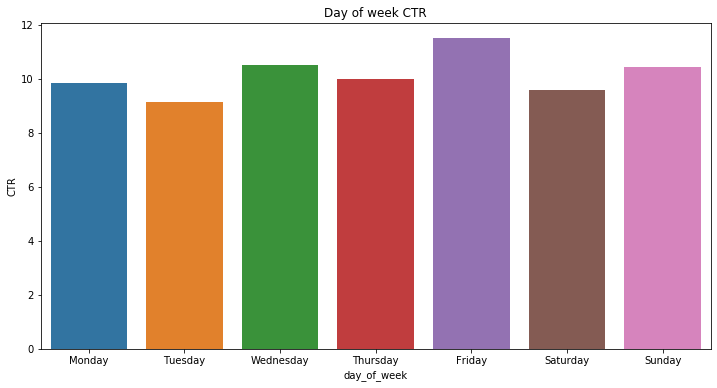

In [275]:
#Plotting CTR Over Week
df_click = df1[df1['clicks'] == 1]
df_dayofweek = df1[['day_of_week','clicks']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'clicks': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','clicks']].groupby(['day_of_week']).count().reset_index()['clicks']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

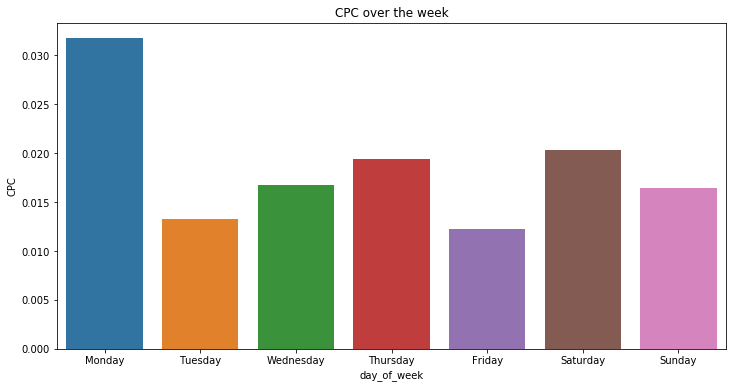

In [276]:
#Plotting CPC Over Week
df_cost =df1[df1['cost'] == 0.1]
df_dayofweek = df1[['day_of_week','cost']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'cost': 'clicks'})
df_dayofweek['cost'] = df_cost[['day_of_week','cost']].groupby(['day_of_week']).count().reset_index()['cost']
df_dayofweek['CPC'] = (df_dayofweek['cost'])/df_dayofweek['clicks']
plt.figure(figsize=(12,6))
sns.barplot(y='CPC', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('CPC over the week');

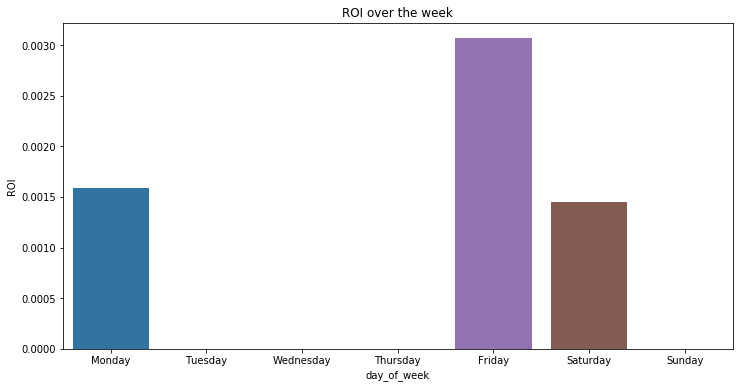

In [277]:
#Plotting ROI Over Week:
df_revenue = df1[df1['revenue'] == 50.00]
df_dayofweek = df1[['day_of_week','revenue']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'revenue': 'cost'})
df_dayofweek['revenue'] = df_revenue[['day_of_week','revenue']].groupby(['day_of_week']).count().reset_index()['revenue']
df_dayofweek['ROI'] = (df_dayofweek['revenue'])/df_dayofweek['cost']
plt.figure(figsize=(12,6))
sns.barplot(y='ROI', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('ROI over the week');

In [278]:
#Function for Outliers:

def findoutliers(col):
    outliers = []
    Q1 = col.quantile(.25)
    Q3 = col.quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1-(1.5*IQR)
    upper_limit = Q3+(1.5*IQR)
    for i in col:
        if i>upper_limit or i<lower_limit:
            outliers.append(i)
    return np.array(outliers)
print(len(findoutliers(df1.impressions)))
print(len(findoutliers(df1.clicks)))
print(len(findoutliers(df1.cost)))
print(len(findoutliers(df1.conversions)))
print(len(findoutliers(df1.revenue)))


644
661
595
582
773


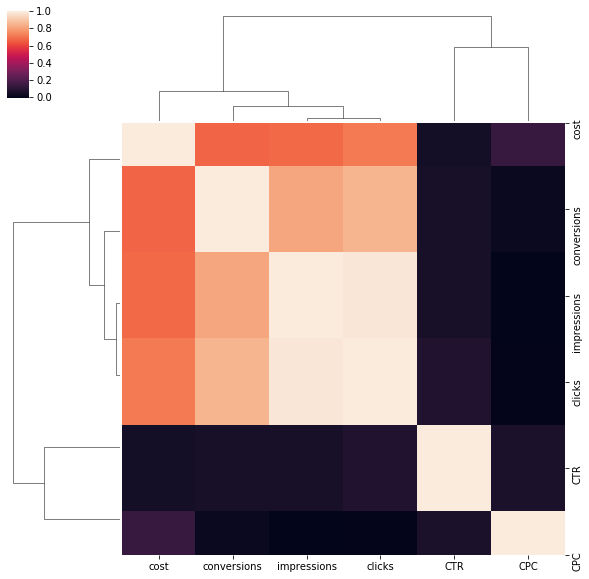

In [280]:
#Finding Correlation:
subset_df = df1[['CTR', 'CPC','conversions', 'impressions', 'cost', 'clicks']].copy()
p1 = sns.clustermap(subset_df.corr())
p1.savefig('plot1.png')

In [281]:
df2 = pd.read_csv('predict.csv')
df2

,index,date,campaign,adgroup,ad,cost
0,0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58
1,1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17
2,2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05
3,3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01
4,4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01
...,...,...,...,...,...,...
313,313,15-03-2021,campaign 1,adgroup 4,ad 55,0.01
314,314,15-03-2021,campaign 1,adgroup 3,ad 55,0.01
315,315,15-03-2021,campaign 1,adgroup 1,ad 55,0.14
316,316,15-03-2021,campaign 1,adgroup 3,ad 56,0.06


In [282]:
h = df2.groupby('adgroup')
h

In [283]:
for adgroup, adgroup_df in h:
    print(adgroup)
    print(adgroup_df)  

adgroup 1
     index        date    campaign    adgroup     ad  cost
0        0  01-03-2021  campaign 1  adgroup 1   ad 1  0.58
6        6  01-03-2021  campaign 1  adgroup 1   ad 2  1.67
10      10  01-03-2021  campaign 1  adgroup 1   ad 3  1.64
15      15  01-03-2021  campaign 1  adgroup 1   ad 7  0.30
18      18  01-03-2021  campaign 1  adgroup 1  ad 10  0.22
..     ...         ...         ...        ...    ...   ...
302    302  15-03-2021  campaign 1  adgroup 1   ad 3  1.36
309    309  15-03-2021  campaign 1  adgroup 1   ad 7  0.23
311    311  15-03-2021  campaign 1  adgroup 1  ad 10  0.10
315    315  15-03-2021  campaign 1  adgroup 1  ad 55  0.14
317    317  15-03-2021  campaign 1  adgroup 1  ad 56  0.33

[90 rows x 6 columns]
adgroup 2
     index        date    campaign    adgroup    ad  cost
3        3  01-03-2021  campaign 1  adgroup 2  ad 1  0.01
4        4  01-03-2021  campaign 1  adgroup 2  ad 2  0.01
7        7  01-03-2021  campaign 1  adgroup 2  ad 3  0.00
14      14  01-03

In [284]:
#Converting date in str to datetime format:
df2['date'] = pd.to_datetime(df2['date'])
df2

,index,date,campaign,adgroup,ad,cost
0,0,2021-01-03,campaign 1,adgroup 1,ad 1,0.58
1,1,2021-01-03,campaign 1,adgroup 3,ad 1,0.17
2,2,2021-01-03,campaign 1,adgroup 4,ad 1,0.05
3,3,2021-01-03,campaign 1,adgroup 2,ad 1,0.01
4,4,2021-01-03,campaign 1,adgroup 2,ad 2,0.01
...,...,...,...,...,...,...
313,313,2021-03-15,campaign 1,adgroup 4,ad 55,0.01
314,314,2021-03-15,campaign 1,adgroup 3,ad 55,0.01
315,315,2021-03-15,campaign 1,adgroup 1,ad 55,0.14
316,316,2021-03-15,campaign 1,adgroup 3,ad 56,0.06


In [285]:
df2['Weekdays']= df1.date.dt.strftime("%a")
df2
df2.dtypes

index                int64
date        datetime64[ns]
campaign            object
adgroup             object
ad                  object
cost               float64
Weekdays            object
dtype: object

In [ ]:
#Training Model to predict the output 

In [405]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

In [429]:
df2 = pd.read_csv('predict.csv')


# Convert feature Campaign from string to float 
df2["campaign"] = df2["campaign"].astype('category')
df2["campaign"] = df2["campaign"].cat.codes


# Convert feature Adgroup from string to float 
df2["adgroup"] = df2["adgroup"].astype('category')
df2["adgroup"] = df2["adgroup"].cat.codes

# Convert feature Ad from string to float 
df2["ad"] = df2["ad"].astype('category')
df2["ad"] = df2["ad"].cat.codes

# Convert feature Date from string to float 
df2["date"] = df2["date"].astype('category')
df2["date"] = df2["date"].cat.codes


# Inserting the features for testing by dropping unwanted column:
features_test = df2.drop(['campaign'], axis = 1)
features_test.shape


(318, 5)

In [430]:
#Importing  Data file again:

df1 = pd.read_csv('data_main.csv')

In [431]:

# Convert feature Campaign from string to float 
df1["campaign"] = df1["campaign"].astype('category')
df1["campaign"] = df1["campaign"].cat.codes


# Convert feature Adgroup from string to float 
df1["adgroup"] = df1["adgroup"].astype('category')
df1["adgroup"] = df1["adgroup"].cat.codes

# Convert feature Ad from string to float 
df1["ad"] = df1["ad"].astype('category')
df1["ad"] = df1["ad"].cat.codes

# Convert feature Date from string to float 
df1["date"] = df1["date"].astype('category')
df1["date"] = df1["date"].cat.codes


# Inserting the labels for training 
labels = df1['cost']

# Inserting the features for traning by dropping columns:
X = df1.drop(['date','campaign','ad','adgroup'], axis = 1)
X.shape

(4571, 5)

In [432]:
# Shuffle and split the data into training and testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X,labels,train_size=0.8,random_state=0)

In [433]:
#Printing shape of train and test data set:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3656, 5) (915, 5) (3656,) (915,)


In [434]:
# Success
print ('Training and testing split was successful')

Training and testing split was successful


In [435]:
# Import the Regressor
from sklearn import linear_model

In [436]:
# Create a Linear Regressor object
regressor = linear_model.LinearRegression()

In [437]:
# Fit the training data to the model 
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [438]:
# Fitting is successful
print ('The data is successful fitted')

The data is successful fitted


In [439]:
# Predict on the Validation set 
predict = regressor.predict(X_test)

In [440]:
# Model successfully predicted on Validation set
print('Prediction is done on Validation set')

Prediction is done on Validation set


In [441]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


In [442]:
# Calculating Data on RMSE Metrics:
mean_sq = mse(y_test,predict)
root_mean_sq = (np.sqrt(mse(y_test,predict)))

In [443]:
# Print the Validation Score
print ('Validation score : ',root_mean_sq, sep = ' ')

Validation score :  4.073871667305264e-13


In [444]:
# Predict on the test data
prediction_test = regressor.predict(features_test)

In [445]:
# Model successfully predicted on Test data
print('Prediction is done on Test data')

Prediction is done on Test data


In [447]:
# Taking the column Index in a Predict:
indx = features_test['index']

In [450]:
# Exporting result in .csv format 
pd.DataFrame({'index': indx,'impressions': prediction_test,'click':prediction_test,'conversions':prediction_test,'revenue':prediction_test}).to_csv('sample_submission.csv',index=False)

In [451]:
# Exporting is successful
print('Exporting is successful')

Exporting is successful
